# Projeto de Previsão de Valor de Apartamento em Goiânia usando R


# Objetivo Geral:

Desenvolver um modelo de machine learning de regressão utilizando a linguagem R para prever o valor de apartamentos em Goiânia, com base em dados históricos e características relevantes.

# Subobjetivos:

#### Preparação de Dados:

- Dados imobiliários de apartamentos em Goiânia, incluindo informações como área, número de quartos, endereço, etc. Realizar a limpeza e pré-processamento dos dados, tratando valores ausentes, duplicatas e outliers.

#### Análise Exploratória de Dados (EDA):

- Realizar visualizações estatísticas e gráficas para entender a distribuição dos dados.
- Explorar a relação entre variáveis independentes e a variável alvo (valor do apartamento).
- Identificar possíveis correlações e padrões nos dados.

#### Modelagem de Machine Learning:

- Dividir os dados em conjuntos de treinamento e validação.
- Selecionar um ou mais algoritmos de regressão (por exemplo, regressão linear, árvore de decisão, regressão de floresta aleatória) para treinamento.
- Treinar os modelos nos dados de treinamento e ajustar os hiperparâmetros conforme necessário.

#### Avaliação e Seleção de Modelo:

- Avaliar o desempenho dos modelos usando métricas de avaliação de regressão, como MSE (Erro Quadrático Médio) e R² (Coeficiente de Determinação).
- Comparar o desempenho dos diferentes modelos e selecionar o melhor modelo com base nas métricas.

### Resumo:

- Pré-processamento de dados imobiliários de apartamentos em Goiânia.
- Análise exploratória de dados para entender a distribuição e relações entre variáveis.
- Treinamento e ajuste de modelos de regressão utilizando algoritmos de machine learning.
- Avaliação e comparação de modelos com base em métricas de desempenho.
- Implementação do modelo para previsões em tempo real e criação de uma interface de usuário.

Este projeto visa criar um modelo capaz de prever o valor de apartamentos em Goiânia, fornecendo insights valiosos para compradores, vendedores e profissionais do mercado imobiliário.
Dados extraídos no dia 07/08/2023.

# Projeto:

In [1]:
df = read.csv('/content/raspar_apartamento.csv', header=TRUE)
head(df)

,nome,endereco,area,quartos,banheiros,garagem,preco
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Apartamento com 2 Quartos à Venda, 64m²","Rua Aporé, 704 - Parque Amazônia, Goiânia - GO",64,2,2,2,360000
2,LA VITA RESIDENCE - 8,"Rua Timburé, 72 - Santa Genoveva, Goiânia - GO",74,2,2,1,386400
3,"Apartamento com 2 Quartos à Venda, 60m²","Avenida Alexandre de Morais, 1 - Parque Amazônia, Goiânia - GO",60,2,2,1,280000
4,"Apartamento com 3 Quartos à Venda, 93m²","Rua Cuiabá, 1 - Parque Amazônia, Goiânia - GO",93,3,4,2,690000
5,"Apartamento com 3 Quartos à Venda, 106m²","Rua do Parque, 1 - Jardim Atlântico, Goiânia - GO",106,2,4,2,698000
6,"Apartamento com 2 Quartos à Venda, 68m²","Rua 1121, 220 - Setor Bueno, Goiânia - GO",68,1,2,1,550000


In [2]:
# linhas x colunas
dim(df)

[1] 18828     7

In [3]:
# nome das colunas
colnames(df)

[1] "nome"      "endereco"  "area"      "quartos"   "banheiros" "garagem"  
[7] "preco"

In [4]:
# Verificando o tipo de cada coluna, estão como strings
str(df)

'data.frame':	18828 obs. of  7 variables:
 $ nome     : chr  "  Apartamento com 2 Quartos à Venda, 64m²  " "  LA VITA RESIDENCE - 8  " "  Apartamento com 2 Quartos à Venda, 60m²  " "  Apartamento com 3 Quartos à Venda, 93m²  " ...
 $ endereco : chr  "Rua Aporé, 704 - Parque Amazônia, Goiânia - GO" "Rua Timburé, 72 - Santa Genoveva, Goiânia - GO" "Avenida Alexandre de Morais, 1 - Parque Amazônia, Goiânia - GO" "Rua Cuiabá, 1 - Parque Amazônia, Goiânia - GO" ...
 $ area     : chr  " 64 " " 74 " " 60 " " 93 " ...
 $ quartos  : chr  " 2 " " 2 " " 2 " " 3 " ...
 $ banheiros: chr  "  2     " "  2     " "  2     " "  4     " ...
 $ garagem  : chr  "  2     " "  1     " "  1     " "  2     " ...
 $ preco    : chr  "       360000      " "       386400      " "       280000      " "       690000      " ...


In [5]:
# Contar valores ausentes em cada coluna
valores_ausentes <- colSums(is.na(df))

# Exibir a contagem de valores ausentes em cada coluna
print(valores_ausentes)

     nome  endereco      area   quartos banheiros   garagem     preco 
        0         0         0         0         0         0         0 


In [6]:
valores_unicos <- lapply(df, unique)
names(valores_unicos) <- names(df)

print(valores_unicos)

$nome
  [1] "  Apartamento com 2 Quartos à Venda, 64m²  " 
  [2] "  LA VITA RESIDENCE - 8  "                   
  [3] "  Apartamento com 2 Quartos à Venda, 60m²  " 
  [4] "  Apartamento com 3 Quartos à Venda, 93m²  " 
  [5] "  Apartamento com 3 Quartos à Venda, 106m²  "
  [6] "  Apartamento com 2 Quartos à Venda, 68m²  " 
  [7] "  Apartamento com  Quarto à Venda, 49m²  "   
  [8] "  Apartamento com 3 Quartos à Venda, 130m²  "
  [9] "  Copas do Bosque  "                         
 [10] "  Apartamento com 2 Quartos à Venda, 87m²  " 
 [11] "  Apartamento com 2 Quartos à Venda, 54m²  " 
 [12] "  Apartamento com 3 Quartos à Venda, 74m²  " 
 [13] "  Apartamento com 2 Quartos à Venda, 71m²  " 
 [14] "  Apartamento com 3 Quartos à Venda, 86m²  " 
 [15] "  Apartamento com 2 Quartos à Venda, 63m²  " 
 [16] "  Residencial Viverde Areião - 70m²  "       
 [17] "  Apartamento com 3 Quartos à Venda, 89m²  " 
 [18] "  Apartamento com 3 Quartos à Venda, 108m²  "
 [19] "  Apartamento com 3 Quartos à Ven

In [7]:
# Excluindo colunas irrelevantes
df$nome <- NULL
df$endereco <- NULL

In [8]:
valores_unicos <- lapply(df, unique)
names(valores_unicos) <- names(df)

print(valores_unicos)

$area
 [1] " 64 "      " 74 "      " 60 "      " 93 "      " 106 "     " 68 "     
 [7] " 49 "      " 130 "     " 103 "     " 87 "      " 54 "      " 71 "     
[13] " 86 "      " 63 "      " 70-74 "   " 89 "      " 108 "     " 83 "     
[19] " 80 "      " 150 "     " 88 "      " 100 "     " 75 "      " 120 "    
[25] " 78 "      " 91 "      " 90 "      " 101 "     " 57 "      " 67 "     
[31] " 56 "      " 131 "     " 99 "      " 122-223 " " 58 "      " 111 "    
[37] " 77-81 "   " 98 "      " 94 "      " 72 "      " 62 "      " 125 "    
[43] " 450 "     " 140 "     " 59 "      " 103-109 " " 79 "      " 84 "     
[49] " 76 "      " 148 "     " 42-61 "   " 191 "     " 185-221 " " 105 "    
[55] " 340 "     " 96-99 "   " 65-147 "  " 52 "      " 55-56 "   " 76-83 "  
[61] " 119 "     " 57-59 "   " 37-49 "   " 96 "      " 68-69 "   " 35-44 "  
[67] " 160 "     " 85-88 "   " 135 "     " 219 "     " 280 "     " 45 "     
[73] " 65 "      " 80-100 "  " 65-71 "   " 69-119 "  " 112-195 " " 62-

In [9]:
# Excluir as linhas que contenham o caractere '-' em qualquer coluna
df <- subset(df, !grepl("-", area) & !grepl("-", quartos) & !grepl("-", banheiros) & !grepl("-", garagem))

In [10]:
valores_unicos <- lapply(df, unique)
names(valores_unicos) <- names(df)

print(valores_unicos)

$area
 [1] " 64 "  " 74 "  " 60 "  " 93 "  " 106 " " 68 "  " 49 "  " 130 " " 103 "
[10] " 87 "  " 54 "  " 71 "  " 86 "  " 63 "  " 89 "  " 108 " " 83 "  " 80 " 
[19] " 150 " " 88 "  " 100 " " 75 "  " 120 " " 78 "  " 91 "  " 90 "  " 101 "
[28] " 57 "  " 67 "  " 56 "  " 131 " " 99 "  " 58 "  " 111 " " 98 "  " 94 " 
[37] " 72 "  " 62 "  " 125 " " 450 " " 59 "  " 79 "  " 84 "  " 76 "  " 148 "
[46] " 191 " " 105 " " 340 " " 52 "  " 96 "  " 135 " " 219 " " 280 " " 167 "
[55] " 119 "

$quartos
[1] " 2 " " 3 " " 1 " " 4 " " 5 " " 6 "

$banheiros
[1] "  2     " "  4     " "  1     " "  5     " "  3     " "  6     "

$garagem
[1] "  2     " "  1     " "  3     " "  5     " "  4     "

$preco
 [1] "       360000      "  "       386400      "  "       280000      " 
 [4] "       690000      "  "       698000      "  "       550000      " 
 [7] "       489000      "  "       990000      "  "       816218      " 
[10] "       560000      "  "       315000      "  "       335000      " 
[13] "       3

In [11]:
# Excluir as linhas que contenham o caractere 'Sob Consulta' em qualquer coluna
df <- subset(df, !grepl("Sob Consulta", preco))

In [12]:
valores_unicos <- lapply(df, unique)
names(valores_unicos) <- names(df)

print(valores_unicos)

$area
 [1] " 64 "  " 74 "  " 60 "  " 93 "  " 106 " " 68 "  " 49 "  " 130 " " 103 "
[10] " 87 "  " 54 "  " 71 "  " 86 "  " 63 "  " 89 "  " 108 " " 83 "  " 80 " 
[19] " 150 " " 88 "  " 100 " " 75 "  " 120 " " 78 "  " 91 "  " 90 "  " 101 "
[28] " 57 "  " 67 "  " 56 "  " 131 " " 99 "  " 58 "  " 111 " " 98 "  " 94 " 
[37] " 72 "  " 62 "  " 125 " " 450 " " 59 "  " 79 "  " 84 "  " 76 "  " 191 "
[46] " 105 " " 340 " " 52 "  " 280 " " 167 " " 119 "

$quartos
[1] " 2 " " 3 " " 1 " " 4 " " 5 " " 6 "

$banheiros
[1] "  2     " "  4     " "  1     " "  5     " "  3     "

$garagem
[1] "  2     " "  1     " "  3     " "  5     " "  4     "

$preco
 [1] "       360000      "  "       386400      "  "       280000      " 
 [4] "       690000      "  "       698000      "  "       550000      " 
 [7] "       489000      "  "       990000      "  "       816218      " 
[10] "       560000      "  "       315000      "  "       335000      " 
[13] "       310000      "  "       440000      "  "       635

In [13]:
# Converter area em inteiro
df$area <- as.integer(df$area)
# Converter quartos em inteiro
df$quartos <- as.integer(df$quartos)
# Converter banheiros em inteiro
df$banheiros <- as.integer(df$banheiros)
# Converter garagem em inteiro
df$garagem <- as.integer(df$garagem)
# Converter preco em inteiro
df$preco <- as.integer(df$preco)

In [14]:
str(df)

'data.frame':	17661 obs. of  5 variables:
 $ area     : int  64 74 60 93 106 68 49 130 103 87 ...
 $ quartos  : int  2 2 2 3 2 1 2 2 1 3 ...
 $ banheiros: int  2 2 2 4 4 2 1 5 4 5 ...
 $ garagem  : int  2 1 1 2 2 1 1 3 2 2 ...
 $ preco    : int  360000 386400 280000 690000 698000 550000 489000 990000 816218 560000 ...


In [15]:
summary(df)

      area           quartos        banheiros        garagem     
 Min.   : 49.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.: 68.00   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:1.000  
 Median : 87.00   Median :2.000   Median :3.000   Median :2.000  
 Mean   : 87.71   Mean   :2.428   Mean   :2.996   Mean   :1.662  
 3rd Qu.:100.00   3rd Qu.:3.000   3rd Qu.:4.000   3rd Qu.:2.000  
 Max.   :450.00   Max.   :6.000   Max.   :5.000   Max.   :5.000  
     preco        
 Min.   : 239000  
 1st Qu.: 406700  
 Median : 550000  
 Mean   : 581262  
 3rd Qu.: 700000  
 Max.   :4750000  

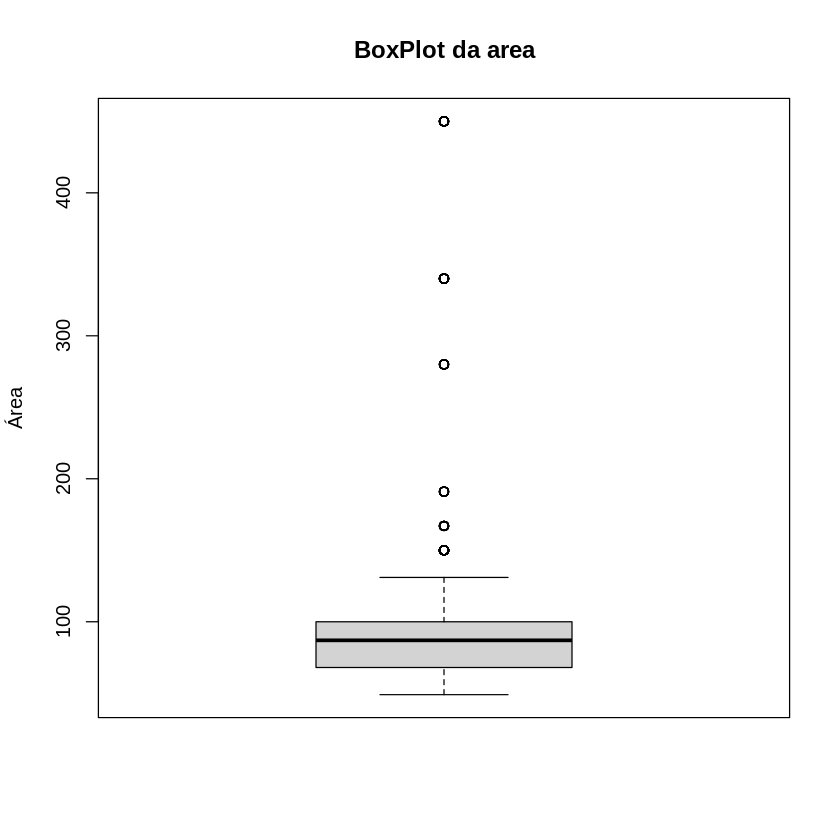

In [16]:
# Boxplot para a area
boxplot(df$area, main="BoxPlot da area", ylab="Área")

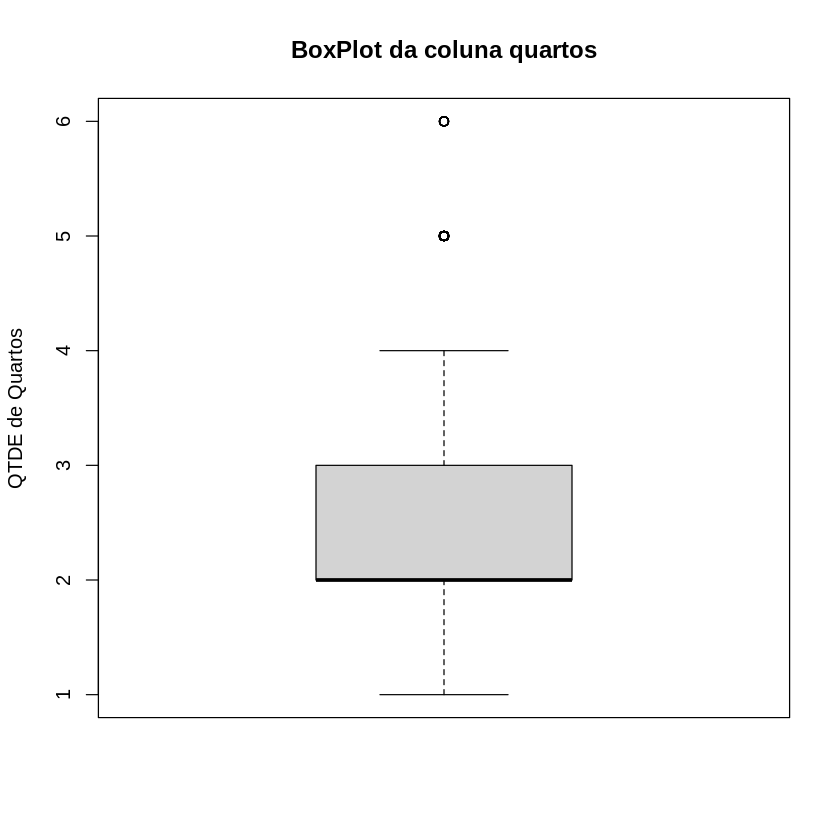

In [17]:
# Bboxplot para a quartos
boxplot(df$quartos, main="BoxPlot da coluna quartos", ylab="QTDE de Quartos")

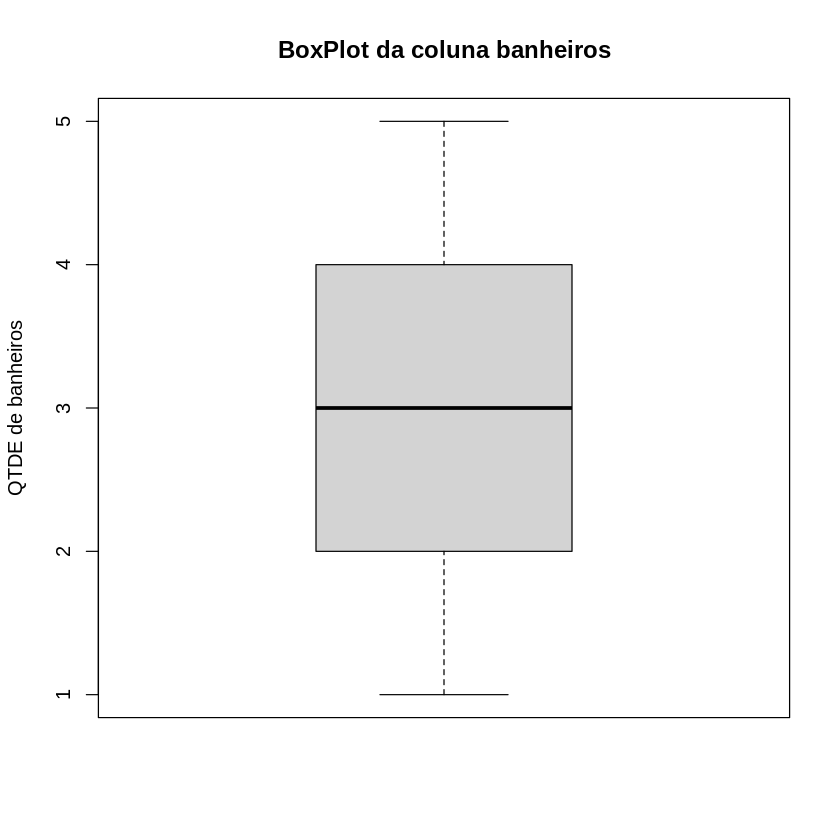

In [18]:
# Boxplot para a banheiros
boxplot(df$banheiros, main="BoxPlot da coluna banheiros", ylab="QTDE de banheiros")

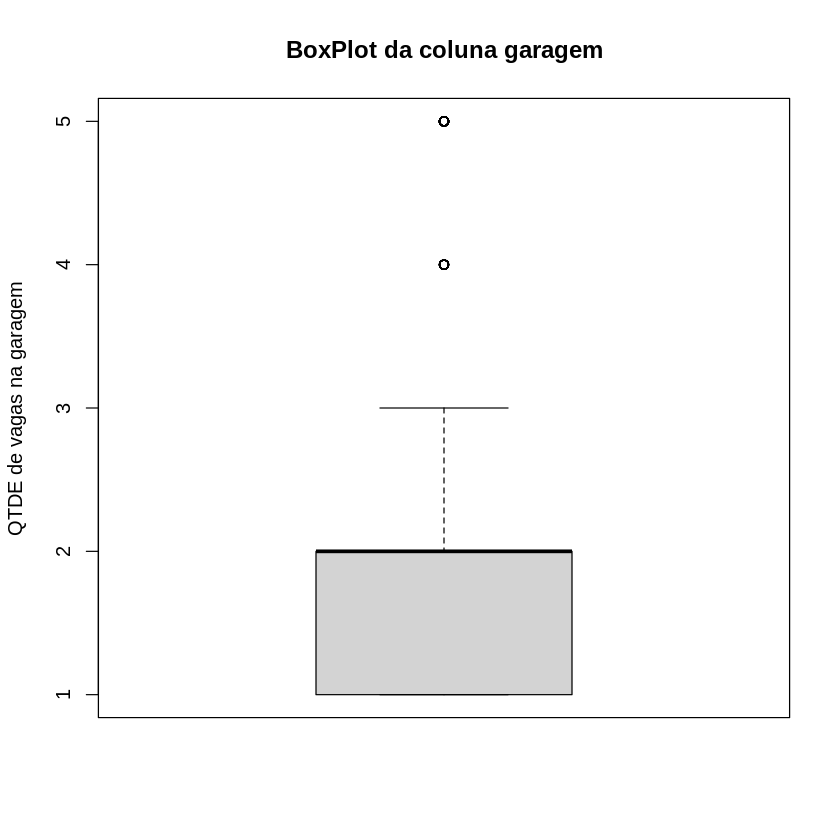

In [19]:
# Boxplot para a garagem
boxplot(df$garagem, main="BoxPlot da coluna garagem", ylab="QTDE de vagas na garagem")

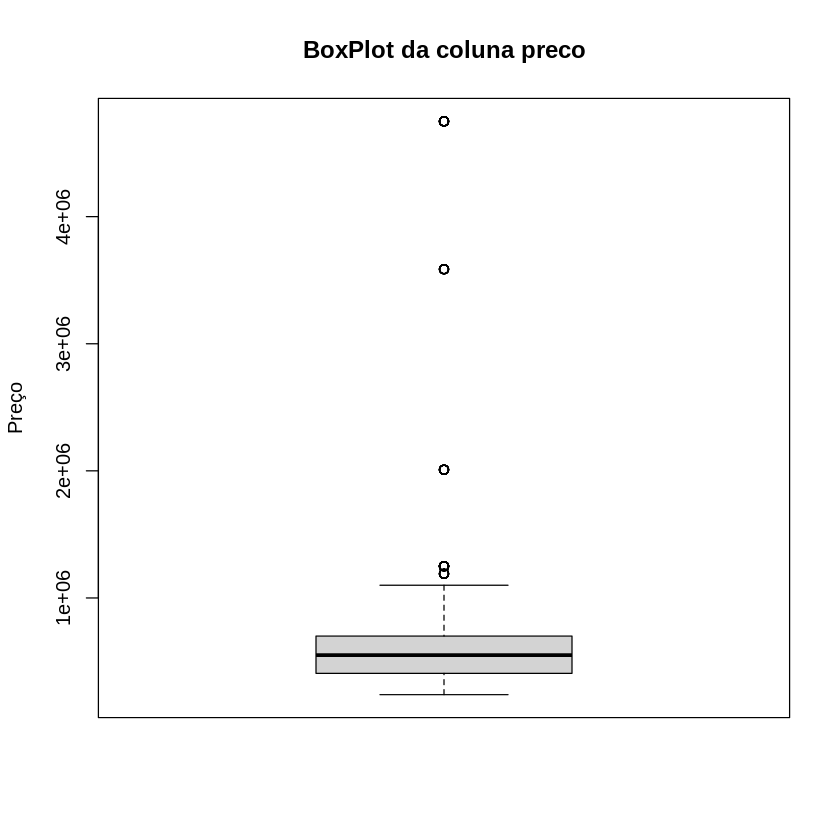

In [20]:
# Boxplot para a preco
boxplot(df$preco, main="BoxPlot da coluna preco", ylab="Preço")

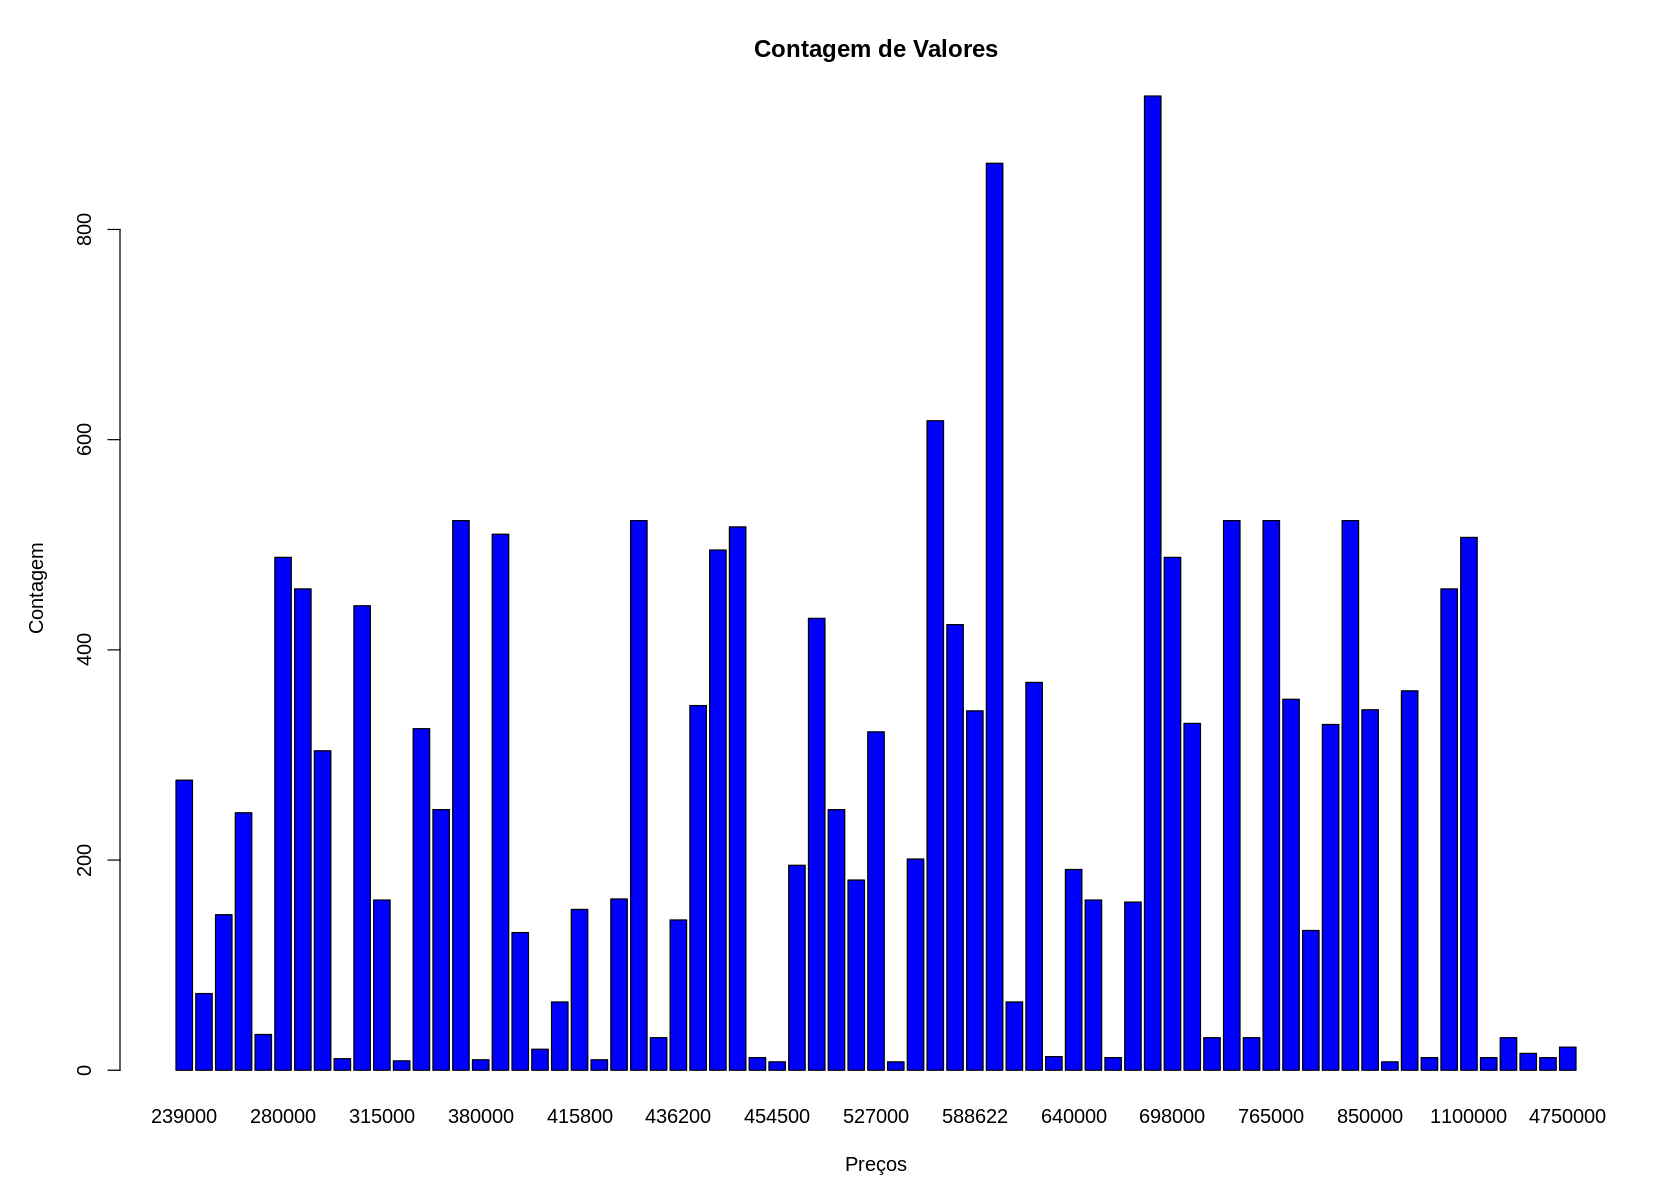

In [21]:
# Calcular a contagem de valores únicos na coluna "preco"
contagem_valores <- table(df$preco)

# Configurar as dimensões da área de plotagem
par(mar = c(5, 5, 4, 2))  # margens esquerda, direita, superior, inferior
options(repr.plot.width = 14, repr.plot.height = 10)  # tamanho total do gráfico

# Criar um gráfico de barras da contagem de valores
barplot(contagem_valores, main = "Contagem de Valores",
        xlab = "Preços", ylab = "Contagem", col='blue')

In [22]:
head(df)

,area,quartos,banheiros,garagem,preco
,<int>,<int>,<int>,<int>,<int>
1,64,2,2,2,360000
2,74,2,2,1,386400
3,60,2,2,1,280000
4,93,3,4,2,690000
5,106,2,4,2,698000
6,68,1,2,1,550000


In [23]:
# selecionando somente as linhas menor os igual a um milhão e quinhetos mil
df <- subset(df, preco <= 1500000)

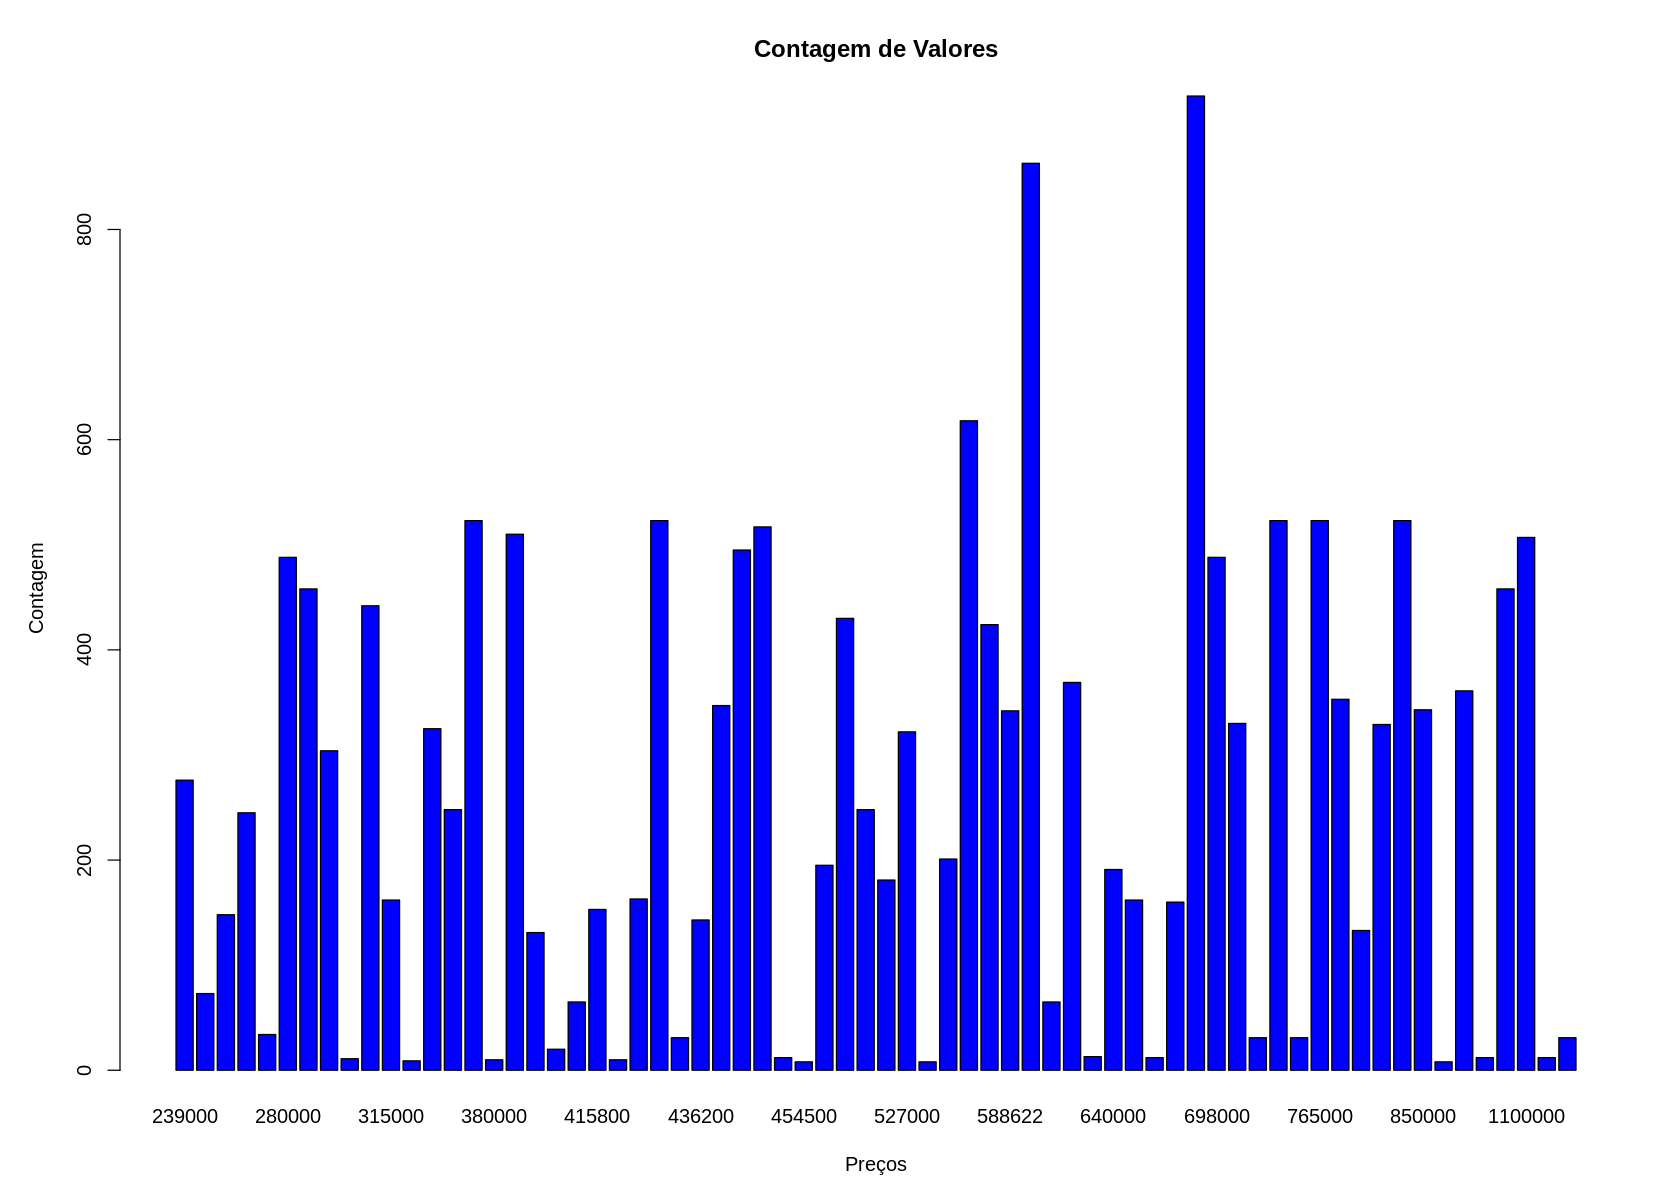

In [24]:
# Calcular a contagem de valores únicos na coluna "preco"
contagem_valores <- table(df$preco)

# Configurar as dimensões da área de plotagem
par(mar = c(5, 5, 4, 2))  # margens esquerda, direita, superior, inferior
options(repr.plot.width = 14, repr.plot.height = 10)  # tamanho total do gráfico

# Criar um gráfico de barras da contagem de valores
barplot(contagem_valores, main = "Contagem de Valores",
        xlab = "Preços", ylab = "Contagem", col='blue')

In [25]:
head(df)

,area,quartos,banheiros,garagem,preco
,<int>,<int>,<int>,<int>,<int>
1,64,2,2,2,360000
2,74,2,2,1,386400
3,60,2,2,1,280000
4,93,3,4,2,690000
5,106,2,4,2,698000
6,68,1,2,1,550000


# Dividindo os dados em Treino e Teste

In [26]:
# Dividir os dados em treinamento e teste
prop_treino <- 0.7
n_treino <- round(prop_treino * nrow(df))

dados_treino <- df[1:n_treino, ]
dados_teste <- df[(n_treino + 1):nrow(df), ]

# Amostragem aleatória para conjuntos de treinamento e validação
set.seed(123)  # Define uma semente para a reprodutibilidade
indices_treino <- sample(nrow(df), n_treino)
dados_treino <- df[indices_treino, ]
dados_validacao <- df[-indices_treino, ]

In [27]:
str(dados_treino)

'data.frame':	12328 obs. of  5 variables:
 $ area     : int  72 67 111 111 80 100 80 71 80 78 ...
 $ quartos  : int  1 4 1 3 1 1 4 2 4 4 ...
 $ banheiros: int  2 2 4 4 3 4 3 1 3 2 ...
 $ garagem  : int  1 1 2 2 2 1 2 1 2 2 ...
 $ preco    : int  527000 515855 850000 850000 600000 833896 600000 674449 600000 450000 ...


In [28]:
str(dados_validacao)

'data.frame':	5283 obs. of  5 variables:
 $ area     : int  130 74 100 120 90 101 67 56 64 49 ...
 $ quartos  : int  2 2 5 3 5 2 2 1 2 3 ...
 $ banheiros: int  5 2 4 4 4 3 2 2 2 1 ...
 $ garagem  : int  3 1 1 2 2 1 1 1 2 1 ...
 $ preco    : int  990000 335000 833896 1100000 690000 424200 460000 269000 360000 489000 ...


In [29]:
# Separar os dados em features (X) e variável alvo (y)
X_treino <- dados_treino[, c("area", "quartos", "banheiros", "garagem")]
y_treino <- dados_treino$preco
X_validacao <- dados_validacao[, c("area", "quartos", "banheiros", "garagem")]
y_validacao <- dados_validacao$preco

In [30]:
# função das métricas e teste padrão

avaliar_e_prever <- function(modelo) {
  # Métricas de avaliação
  previsoes_validacao <- predict(modelo, newdata = dados_validacao)
  mae <- mean(abs(previsoes_validacao - dados_validacao$preco))
  mse <- mean((previsoes_validacao - dados_validacao$preco)^2)
  rmse <- sqrt(mean((previsoes_validacao - dados_validacao$preco)^2))
  r2 <- 1 - sum((dados_validacao$preco - previsoes_validacao)^2) / sum((dados_validacao$preco - mean(dados_validacao$preco))^2)

  # Exibindo as métricas arredondadas para 4 casas decimais
  cat("Métricas de Avaliação:\n")
  cat(paste("R²:", round(r2, 4), "\n"))
  cat(paste("MAE:", round(mae, 4), "\n"))
  cat(paste("MSE:", round(mse, 4), "\n"))
  cat(paste("RMSE:", round(rmse, 4), "\n\n"))

  # Fazendo uma previsão usando o modelo
  novo_dado <- data.frame(area = 120, quartos = 2, banheiros = 2, garagem = 1)
  previsao <- predict(modelo, novo_dado)
  previsao <- round(previsao, digits = 0)

  # Exiba a previsão
  cat("Previsão:\n")
  cat(paste("Preço previsto:", previsao, "\n"))
}

# Modelo Árvore de decisão

In [31]:
# Modelo Árvore de decisão

# Instalar o pacote rpart (caso ainda não esteja instalado)
install.packages("rpart")

# Carregar o pacote rpart
library(rpart)

# Criar o modelo de árvore de decisão
modelo_arvore <- rpart(y_treino ~ ., data = X_treino, control = rpart.control(maxdepth = 2))

# Fazer previsões para os dados de validação
previsoes_validacao <- predict(modelo_arvore, newdata = X_validacao)

# Usando a função para avaliar e prever
avaliar_e_prever(modelo_arvore)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Métricas de Avaliação:
R²: 0.7372 
MAE: 92777.4028 
MSE: 12915874306.6916 
RMSE: 113648.0282 

Previsão:
Preço previsto: 469766 


#### Calculando outros valores de maxdepth (profundidade)

In [32]:
# Valores de maxdepth para testar
profundidades <- c(2,3,4,5,6,7,8,9,10,15,20,30)

# loop de repetição da profundidade da árvore
for (profundidade in profundidades){
    cat(paste("Profundidade:", profundidade , "\n"))
    # Criar o modelo de árvore de decisão usando os dados de treinamento
    modelo_arvore <- rpart(y_treino ~ ., data = X_treino, control = rpart.control(maxdepth = profundidade))
    # Fazer previsões para os dados de validação
    previsoes_validacao <- predict(modelo_arvore, newdata = X_validacao)
    # Usando a função para avaliar e prever
    avaliar_e_prever(modelo_arvore)
}

Profundidade: 2 
Métricas de Avaliação:
R²: 0.7372 
MAE: 92777.4028 
MSE: 12915874306.6916 
RMSE: 113648.0282 

Previsão:
Preço previsto: 469766 
Profundidade: 3 
Métricas de Avaliação:
R²: 0.8059 
MAE: 75943.4647 
MSE: 9538246040.5839 
RMSE: 97663.9444 

Previsão:
Preço previsto: 460860 
Profundidade: 4 
Métricas de Avaliação:
R²: 0.8381 
MAE: 67880.8352 
MSE: 7954063412.3352 
RMSE: 89185.5561 

Previsão:
Preço previsto: 460860 
Profundidade: 5 
Métricas de Avaliação:
R²: 0.8381 
MAE: 67880.8352 
MSE: 7954063412.3352 
RMSE: 89185.5561 

Previsão:
Preço previsto: 460860 
Profundidade: 6 
Métricas de Avaliação:
R²: 0.8381 
MAE: 67880.8352 
MSE: 7954063412.3352 
RMSE: 89185.5561 

Previsão:
Preço previsto: 460860 
Profundidade: 7 
Métricas de Avaliação:
R²: 0.8381 
MAE: 67880.8352 
MSE: 7954063412.3352 
RMSE: 89185.5561 

Previsão:
Preço previsto: 460860 
Profundidade: 8 
Métricas de Avaliação:
R²: 0.8381 
MAE: 67880.8352 
MSE: 7954063412.3352 
RMSE: 89185.5561 

Previsão:
Preço previsto

# Modelo Random Forest

In [33]:
# Modelo Random Forest

# Instalar o pacote randomForest (caso ainda não esteja instalado)
install.packages("randomForest")

# Carregar o pacote randomForest
library(randomForest)

# Criar o modelo Random Forest
modelo_rf <- randomForest(X_treino, y_treino)

# Fazer previsões para os dados de validação
previsoes_validacao <- predict(modelo_rf, X_validacao)

# Usando a função para avaliar e prever
avaliar_e_prever(modelo_rf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



Métricas de Avaliação:
R²: 0.839 
MAE: 67562.7029 
MSE: 7911161773.1632 
RMSE: 88944.7119 

Previsão:
Preço previsto: 502455 


In [34]:
# Salvar o modelo em um arquivo
saveRDS(modelo_rf, "modelo_rf.rds")

### Análise das métricas:

- R² (Coeficiente de Determinação): O valor de R² é 0.8453, o que indica que o modelo explica cerca de 84.53% da variabilidade presente nos dados de validação. Isso é uma boa indicação de que o modelo está capturando uma parte significativa da variação dos preços.

- MAE (Erro Médio Absoluto): O MAE é 66402.9269, o que significa que, em média, as previsões do modelo têm um desvio absoluto de aproximadamente 66402.93 unidades da variável alvo (preços).

- MSE (Erro Quadrático Médio): O MSE é 7604577352.5411, que é o quadrado médio dos erros entre as previsões do modelo e os valores reais. Quanto menor o MSE, melhor o modelo se ajusta aos dados. Neste caso, o valor é alto, o que indica que os erros podem ser relativamente grandes.

- RMSE (Raiz do Erro Quadrático Médio): O RMSE é 87204.2278, que é a raiz quadrada do MSE. Ele fornece uma medida da dispersão dos erros em relação à escala dos preços reais.

##### Quanto à previsão específica:

- O modelo fez uma previsão de preço de R$ 491200 para um dado de entrada específico. Isso é o valor previsto para esse caso particular, com base nas características fornecidas ao modelo.

# Implementação do modelo para previsões em tempo real e criação de uma interface de usuário

In [35]:
library(IRdisplay)

# Carregar o modelo treinado
modelo_rf <- readRDS("modelo_rf.rds")

# Criar widgets interativos
widget_area <- display_html('<label for="area">Área:</label><br><input type="number" id="area" value="65"><br>')
widget_quartos <- display_html('<label for="quartos">Quartos:</label><br><input type="number" id="quartos" value="2"><br>')
widget_banheiros <- display_html('<label for="banheiros">Banheiros:</label><br><input type="number" id="banheiros" value="2"><br>')
widget_garagem <- display_html('<label for="garagem">Garagem:</label><br><input type="number" id="garagem" value="1"><br>')

botao_prever <- display_html('<button id="botao_prever">Fazer Previsão</button><br>')
output_resultado <- display_html('<div id="resultado"></div>')

# Adicionar função JavaScript para fazer previsões
javascript_code <- '
<script>
function display_previsao() {
  var area = parseFloat(document.getElementById("area").value);
  var quartos = parseFloat(document.getElementById("quartos").value);
  var banheiros = parseFloat(document.getElementById("banheiros").value);
  var garagem = parseFloat(document.getElementById("garagem").value);

  var novos_dados = [{"area": area, "quartos": quartos, "banheiros": banheiros, "garagem": garagem}];
  var previsao = novos_dados.map(function(d) {
    return JSON.parse(Jupyter.notebook.kernel.execute(\'previsao <- predict(modelo_rf, data.frame(area = \' + d.area + \', quartos = \' + d.quartos + \', banheiros = \' + d.banheiros + \', garagem = \' + d.garagem + \'))\')[\'content\'][\'text/plain\']);
  });

  var resultado_div = document.getElementById("resultado");
  resultado_div.innerHTML = "Previsão: " + previsao;
}

document.getElementById("botao_prever").addEventListener("click", display_previsao);
</script>
'

# Exibir widgets e código JavaScript
display_html(widget_area)
display_html(widget_quartos)
display_html(widget_banheiros)
display_html(widget_garagem)
display_html(botao_prever)
display_html(output_resultado)
display_javascript(javascript_code)

Área:

Quartos:

Banheiros:

Garagem:

Fazer Previsão